In [21]:
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [22]:
# %matplotlib inline
%matplotlib notebook

In [48]:
zHeight = 20
dotsPerLayer = 1000

In [49]:
u = np.linspace(0, 1, num=dotsPerLayer)

In [50]:
x = np.cos(2 * math.pi * u) * 100
y = np.sin(2 * math.pi * u) * 100
z = list(map(lambda el: [el] * dotsPerLayer, np.linspace(0, 1000, num=zHeight)))

In [51]:
x

array([ 100.        ,   99.99802213,   99.99208861,   99.98219966,
         99.96835567,   99.95055721,   99.92880496,   99.9030998 ,
         99.87344273,   99.83983493,   99.80227773,   99.76077261,
         99.71532122,   99.66592536,   99.61258698,   99.55530818,
         99.49409124,   99.42893857,   99.35985276,   99.28683654,
         99.20989279,   99.12902455,   99.04423504,   98.95552759,
         98.86290573,   98.76637311,   98.66593356,   98.56159103,
         98.45334968,   98.34121377,   98.22518773,   98.10527617,
         97.98148383,   97.85381559,   97.72227652,   97.58687181,
         97.44760682,   97.30448706,   97.15751819,   97.00670603,
         96.85205653,   96.69357583,   96.53127018,   96.36514601,
         96.19520989,   96.02146854,   95.84392883,   95.66259779,
         95.47748259,   95.28859056,   95.09592915,   94.89950601,
         94.69932889,   94.49540571,   94.28774455,   94.07635361,
         93.86124125,   93.642416  ,   93.4198865 ,   93.19366

In [27]:
y

array([  0.00000000e+00,   6.34239197e-01,   1.26592454e+00,
         1.89251244e+00,   2.51147987e+00,   3.12033446e+00,
         3.71662456e+00,   4.29794912e+00,   4.86196736e+00,
         5.40640817e+00,   5.92907929e+00,   6.42787610e+00,
         6.90079011e+00,   7.34591709e+00,   7.76146464e+00,
         8.14575952e+00,   8.49725430e+00,   8.81453363e+00,
         9.09631995e+00,   9.34147860e+00,   9.54902241e+00,
         9.71811568e+00,   9.84807753e+00,   9.93838464e+00,
         9.98867339e+00,   9.99874128e+00,   9.96854776e+00,
         9.89821442e+00,   9.78802446e+00,   9.63842159e+00,
         9.45000819e+00,   9.22354294e+00,   8.95993774e+00,
         8.66025404e+00,   8.32569855e+00,   7.95761841e+00,
         7.55749574e+00,   7.12694171e+00,   6.66769001e+00,
         6.18158986e+00,   5.67059864e+00,   5.13677392e+00,
         4.58226522e+00,   4.00930535e+00,   3.42020143e+00,
         2.81732557e+00,   2.20310533e+00,   1.58001396e+00,
         9.50560433e-01,

In [52]:
def repeat(np_array, n):
    return np.array([np_array] * n)

<IPython.core.display.Javascript object>


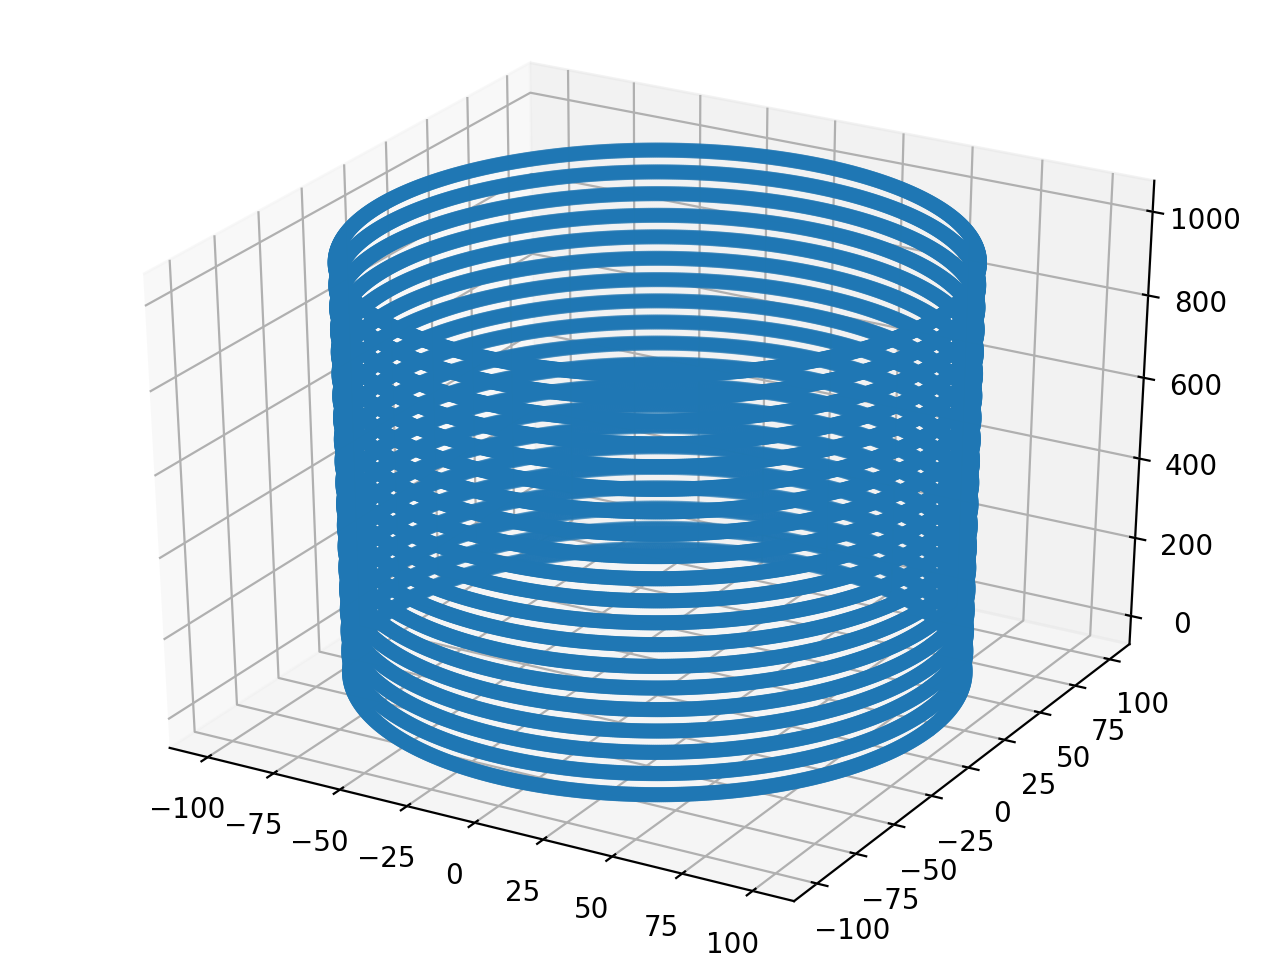

In [53]:
fig = plt.figure()

ax = Axes3D(fig)


ax.scatter(repeat(x, zHeight), repeat(y, zHeight), z)

In [89]:
alpha = 35.264
beta = 45
alpha_rad = math.radians(alpha)
beta_rad = math.radians(beta)

In [90]:
A = np.matrix([
    [1, 0, 0],
    [0, math.cos(alpha_rad), math.sin(alpha_rad)],
    [0, -math.sin(alpha_rad), math.cos(alpha_rad)]
]);
B = np.matrix([
    [math.cos(beta_rad), 0, -math.sin(beta_rad)],
    [0, 1, 0],
    [math.sin(beta_rad), 0, math.cos(beta_rad)]
]);

In [91]:
converting_matrix = math.sqrt(6) * np.matrix([
    [math.sqrt(3), 0, -math.sqrt(3)],
    [1, 2, 1],
    [math.sqrt(2), -math.sqrt(2), math.sqrt(2)]]);

In [92]:
converting_matrix

matrix([[ 4.24264069,  0.        , -4.24264069],
        [ 2.44948974,  4.89897949,  2.44948974],
        [ 3.46410162, -3.46410162,  3.46410162]])

In [93]:
converting_matrix = A * B

In [94]:
converting_matrix

matrix([[ 0.70710678,  0.        , -0.70710678],
        [ 0.40824436,  0.81650051,  0.40824436],
        [ 0.57735305, -0.57734472,  0.57735305]])

In [95]:
stacked_xy = np.column_stack((x, y))

In [96]:
xi = []
yi = []
for xy in stacked_xy:
    cm = converting_matrix.dot(np.array([xy[0], xy[1], 0]))
    xi.append(float(cm[:,0]))
    yi.append(float(cm[:,1]))

In [97]:
def x_to_iso(x):
    return math.sqrt(0.5)

<IPython.core.display.Javascript object>


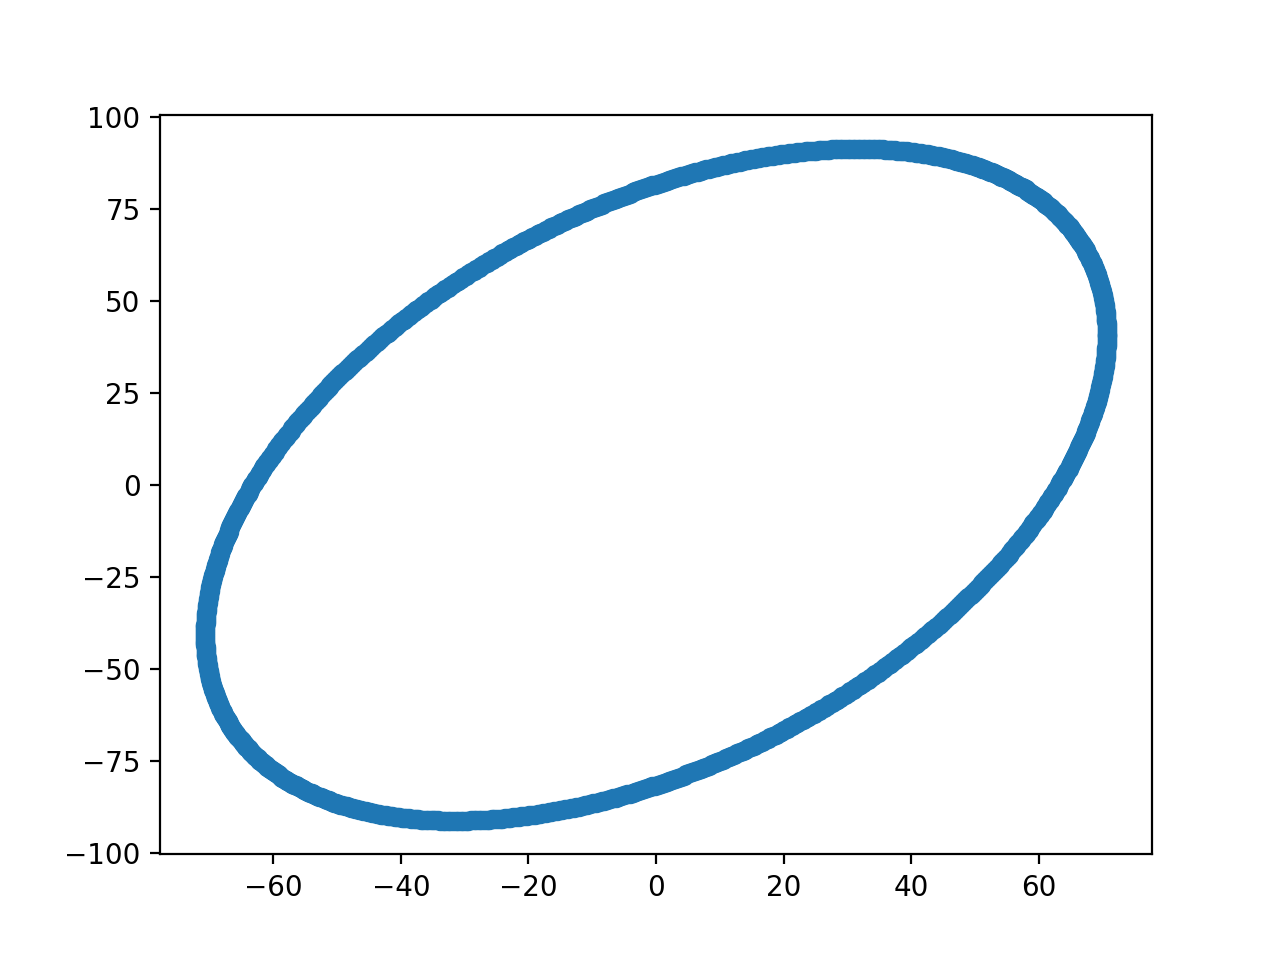

In [98]:
plt.scatter(xi, yi)

In [64]:
def to_xy(x, y):
    center = 500
    bottom = 500;
    return (x + center, bottom - y)

In [65]:
def draw_axis(canvas):
    canvas.create_line(to_xy(0, 0), to_xy(0, 300))
    canvas.create_line(to_xy(0, 0), to_xy(200, -200))
    canvas.create_line(to_xy(0, 0), to_xy(-300, 0))
    #canvas.create_line(to_xy(0, 0), to_xy(300, -150))
    #canvas.create_line(to_xy(0, 0), to_xy(-300, -150))

In [66]:
xyi = list(zip(xi, yi))

In [67]:
def draw_circle(canvas):
    for i in range(len(xyi) - 1):
        xy0 = xyi[i]
        xy1 = xyi[i + 1];
        x0 = xy0[0];
        y0 = xy0[1];
        x1 = xy1[0];
        y1 = xy1[1];
        canvas.create_line(to_xy(x0, y0), to_xy(x1, y1))

In [68]:
import tkinter

root = tkinter.Tk()
canvas = tkinter.Canvas(root)
canvas.pack(fill="both", expand=True)

root.geometry("1000x1000") #You want the size of the app to be 500x500

draw_axis(canvas)
draw_circle(canvas)

root.mainloop()